# 02. Neural Network Classification with PyTorch 

Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options)

Resources: https://www.learnpytorch.io/02_pytorch_classification/

In [1]:
import torch
from torch import nn

print(torch.__version__)

2.7.1


## 1. Make classification data and get it ready

In [8]:
import sklearn
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(
    n_samples,
    noise=0.05,
    random_state=4
)

In [9]:
len(X), len(y)

(1000, 1000)

In [11]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[-0.62899052  0.46718274]
 [ 0.45081395  0.67670509]
 [-0.81272057 -0.16994687]
 [-0.66015042 -0.43389572]
 [ 0.84586661  0.27667558]]
First 5 samples of y:
 [1 1 1 1 1]


In [15]:
# Make DataFrame of circle data
import pandas as pd

circles = pd.DataFrame({
    "X1": X[:, 0], 
    "X2": X[:, 1],
    "label": y
})

circles.head(10)

,X1,X2,label
0,-0.628991,0.467183,1
1,0.450814,0.676705,1
2,-0.812721,-0.169947,1
3,-0.660150,-0.433896,1
4,0.845867,0.276676,1
5,-0.537463,-0.565597,1
6,0.652109,-0.336089,1
7,0.772069,-0.000567,1
8,-0.583008,-0.563453,1
9,-0.327103,1.023284,0


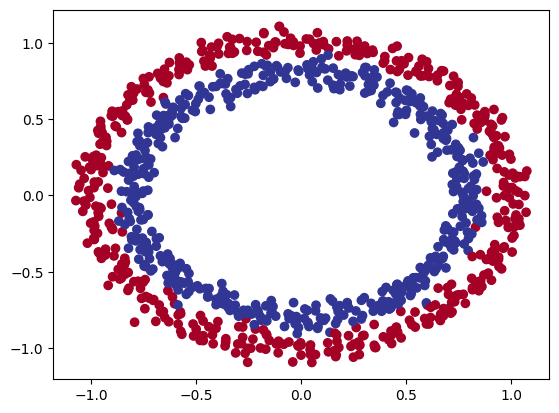

In [20]:
# Visualize
import matplotlib.pyplot as plt

plt.scatter(
    x=X[:, 0],
    y=X[:, 1],
    c=y,
    cmap=plt.cm.RdYlBu
)
plt.show()

**Note:** The data we're working with is reffered to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals.

### 1.1 Check input and output shapes

In [21]:
X.shape, y.shape

((1000, 2), (1000,))

In [22]:
X

array([[-0.62899052,  0.46718274],
       [ 0.45081395,  0.67670509],
       [-0.81272057, -0.16994687],
       ...,
       [ 0.73640306, -0.661122  ],
       [-0.54084467,  0.82477198],
       [ 0.07277009,  0.9536204 ]], shape=(1000, 2))

In [23]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,

In [26]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [-0.62899052  0.46718274] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [29]:
# Turn data into tensors
X_tensor = torch.from_numpy(X).type(torch.float32)
y_tensor = torch.from_numpy(y).type(torch.float32)

X[:5], y[:5]

(array([[-0.62899052,  0.46718274],
        [ 0.45081395,  0.67670509],
        [-0.81272057, -0.16994687],
        [-0.66015042, -0.43389572],
        [ 0.84586661,  0.27667558]]),
 array([1, 1, 1, 1, 1]))

In [30]:
type(X_tensor), X_tensor.dtype, y_tensor.dtype

(torch.Tensor, torch.float32, torch.float32)

In [31]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_tensor, y_tensor, 
    test_size=0.2, # 0.2 = 20% of data will be test and 80% will be train
    random_state=42, # random seed 
)

In [33]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

 Let's build a model to classify our blue and red dots.

 To do so, we want to:
 1. Set up device agnostic code so our code will run on an accelerator (GPU / MPS) if there is one
 2. Construct a model (by subclassing `nn.Module`)
 3. Define a loss function and optimizer
 4. Create a training and test loop

In [35]:
# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "mps"
device

'mps'